In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score

In [2]:
#irisデータのロード
iris = load_iris()

In [3]:
#1.dataframeに変換する
feature_name = ["sepal_length","sepal_width","petal_length","petal width"]
df_creation_myself = pd.DataFrame(iris.data, columns=feature_name)
df_creation_myself["target"] = iris.target
df_creation_myself.head()

,sepal_length,sepal_width,petal_length,petal width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#2.iris dataのcsvを直に読み込む
columns = ["sepal_length","sepal_width","petal_length","petal width", "target"]
df_from_csv = pd.read_csv(iris.filename, names=columns).drop(0)
df_from_csv.head()

,sepal_length,sepal_width,petal_length,petal width,target
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [9]:
df_origin = df_from_csv

#データの分割
(train_X, test_X, train_y, test_y) = train_test_split(
    df_origin.drop("target", axis=1), df_origin.target, test_size = 0.3, random_state = 0
)

In [11]:
#ハイパーパラメーターの調整
from sklearn import tree
from sklearn.model_selection import GridSearchCV


# チューニングするパラメータ
tuned_parameters = {
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], # 木の深さを1-10で
    "max_leaf_nodes": [2,4,6,8,10] # 最大終端ノード数を2,4,6,8,10で
}


#上記で用意したパラメーターごとに交差検証を実施。
#最適な木の深さを確認
clf = GridSearchCV(tree.DecisionTreeClassifier(random_state=0,splitter='best'), tuned_parameters, scoring="accuracy",cv=5, n_jobs=-1)

#モデル作成
clf = clf.fit(train_X, train_y)

print("Best Parameter: {}".format(clf.best_params_))
print("Best Parameterでの検証用データの精度: {:.2f}".format(clf.score(test_X, test_y)))
print("Best Parameterで交差検証した精度の平均（訓練データ）: {:.2f}".format(clf.best_score_))

Best Parameter: {'max_depth': 3, 'max_leaf_nodes': 4}
Best Parameterでの検証用データの精度: 0.98
Best Parameterで交差検証した精度の平均（訓練データ）: 0.94


/Users/ryo_tanaka/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


/Users/ryo_tanaka/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


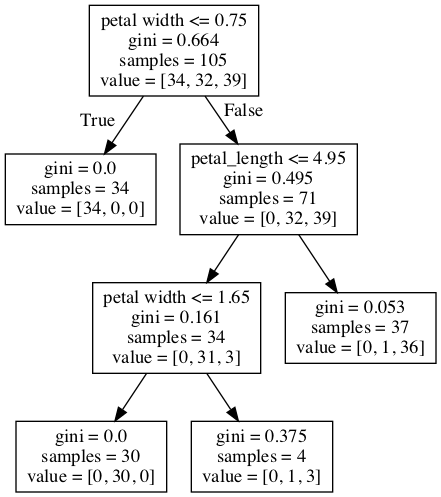

In [12]:
#best scoreのparametersを使って学習する
clf = tree.DecisionTreeClassifier(max_depth=3, max_leaf_nodes=4, random_state=0)
clf = clf.fit(train_X, train_y)


#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

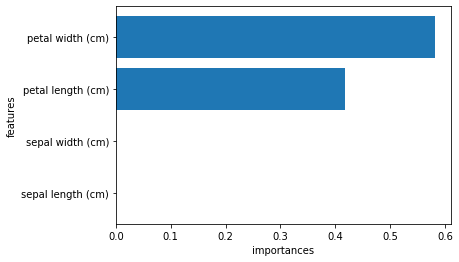

In [15]:
#変数重要度
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


def plot_feature_importances(model):
    n_features = iris.data.shape[1] # 全説明変数
    plt.barh(range(n_features), model.feature_importances_, align="center") # 描画する際の枠組みを設定
    plt.yticks(np.arange(n_features), iris.feature_names) # 縦軸の設定
    plt.xlabel("importances") # 横軸の設定
    plt.ylabel("features") # 縦軸の設定
    plt.show()

plot_feature_importances(clf)